In [30]:
import pickle as pk
from tqdm import tqdm
import numpy as np
START_YAER = 1800
END_YAER = 2021
CUT_YEAR_COUNT = 3
NO_CUT_YEAR = 100
print('参数设置: START_YAER: %d, END_YAER: %d, CUT_YEAR_COUNT: %d'%(START_YAER, END_YAER, CUT_YEAR_COUNT))
# 职业生涯至少2年的研究者
cutyearCount = 2
InitialSpan = 1

参数设置: START_YAER: 1800, END_YAER: 2021, CUT_YEAR_COUNT: 3


In [31]:


#初始学科
KeyInitialSetCounter=pk.load( open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/KeyInitialSetCounter%d_%d_True%dCut全生涯Span%d.pk'%(START_YAER,END_YAER,cutyearCount,InitialSpan), 'rb'))
KeyInitialSetCounterM=pk.load( open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/KeyInitialSetCounterM%d_%d_True%dCut全生涯Span%d.pk'%(START_YAER,END_YAER,cutyearCount,InitialSpan), 'rb'))
#不动学科
KeyNoBreakthroughCounter=pk.load( open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/KeyNoBreakthroughCounter%d_%d_True%dCut全生涯Span%d.pk'%(START_YAER,END_YAER,cutyearCount,InitialSpan), 'rb'))
KeyNoBreakthroughCounterM=pk.load( open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/KeyNoBreakthroughCounterM%d_%d_True%dCut全生涯Span%d.pk'%(START_YAER,END_YAER,cutyearCount,InitialSpan), 'rb'))
#动的学科，谁向谁变动的最多？
KeyBreakthroughCombineCounterM21=pk.load( open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/KeyBreakthroughCombineCounterM21%d_%d_True%dCut全生涯Span%d.pk'%(START_YAER,END_YAER,cutyearCount,InitialSpan), 'rb'))
KeyBreakthroughCombineCounter=pk.load( open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/KeyBreakthroughCombineCounter%d_%d_True%dCut全生涯Span%d.pk'%(START_YAER,END_YAER,cutyearCount,InitialSpan), 'rb'))
# 年份统计
keyTrueSpanAllSum=pk.load( open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/keyTrueSpanAllSum%d_%d_True%dCut全生涯Span%d.pk'%(START_YAER,END_YAER,cutyearCount,InitialSpan), 'rb'))
keyDateSpanAllSum=pk.load( open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/keyDateSpanAllSum%d_%d_True%dCut全生涯Span%d.pk'%(START_YAER,END_YAER,cutyearCount,InitialSpan), 'rb'))
keyBreakthroughDateYearAllSum=pk.load( open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/keyBreakthroughDateYearAllSum%d_%d_True%dCut全生涯Span%d.pk'%(START_YAER,END_YAER,cutyearCount,InitialSpan), 'rb'))
keyBreakthroughPointYearAllSum=pk.load( open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/keyBreakthroughPointYearAllSum%d_%d_True%dCut全生涯Span%d.pk'%(START_YAER,END_YAER,cutyearCount,InitialSpan), 'rb'))
KeyStartYearSum=pk.load( open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/KeyStartYearSum%d_%d_True%dCut全生涯Span%d.pk'%(START_YAER,END_YAER,cutyearCount,InitialSpan), 'rb'))

In [32]:
fieldlist = list(KeyInitialSetCounter.keys())

In [33]:
potentialset = set()
for i in fieldlist:
    for j in fieldlist:
        if i != j:
            potentialset.add(i+'-->>>>--'+j)
print(len(potentialset))

272


In [34]:
n = 20
for k,v in sorted(KeyBreakthroughCombineCounter.items(), key=lambda x: x[1]):
    print(k.split('-->>>>--')[0]+','+k.split('-->>>>--')[1]+','+str(v))
    n-=1
    if n == 0:
        break

教育学,材料科学,23
材料科学,心理学,62
心理学,材料科学,62
材料科学,教育学,64
材料科学,法学,68
教育学,地球科学,72
法学,物理与天体物理,79
法学,材料科学,86
经济学,化学,90
法学,化学,93
管理学,化学,100
经济学,材料科学,110
管理学,物理与天体物理,111
材料科学,经济学,114
人文科学,材料科学,119
材料科学,人文科学,130
化学,经济学,132
教育学,物理与天体物理,141
化学,法学,150
地球科学,教育学,166


条形图：各学科的作者数量（数initialSet中各学科的数，至少有两年以主要负责人发过文章的数量）

In [35]:
import numpy as np
# plot 同时中英混排
import matplotlib.pyplot as plt
from matplotlib import font_manager
import matplotlib.ticker as mtick
import pickle as pk
plt.style.use('seaborn')
plt.figure(figsize=(4,3), dpi=300)
# 字体加载
font_path = "../../font/tnw+simsun.ttf"
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
# 字体设置
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()  # 根据名称设置字体
plt.rcParams['font.size'] = 16 # 设置字体大小
plt.rcParams['axes.unicode_minus'] = False # 使坐标轴刻度标签正常显示正负号

C:\Users\jiawei\AppData\Local\Temp\ipykernel_31948\4082600336.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<Figure size 1200x900 with 0 Axes>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


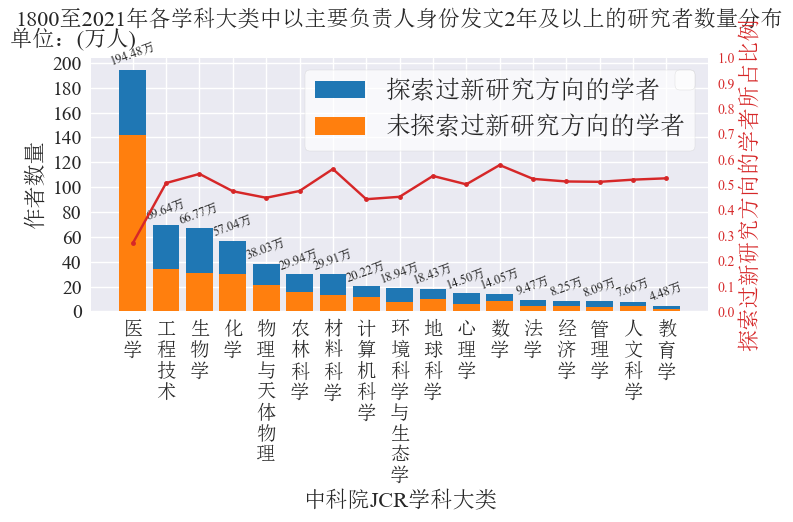

In [36]:
# 各学科作者数量分布（至少2年主要负责人经历）
Fields , frequency = zip(*sorted(KeyInitialSetCounter.items(),key=lambda x:-x[1]))
frequency = np.array(frequency)
NobreakFields , Nobreakfrequency = zip(*sorted(KeyNoBreakthroughCounter.items(),key=lambda x:-x[1]))
Nobreakfrequency = np.array(Nobreakfrequency)
# print(numFields, frequency)
ept_list = []
for i in Fields:
    ept_list.append('\n'.join(list(i)))
fig, ax = plt.subplots()
plt.text(-0.03,1.07,'单位：(万人)',
horizontalalignment='center',verticalalignment='center',
transform=ax.transAxes)
bars = ax.bar(Fields, frequency/10000.0, label='探索过新研究方向的学者',color='tab:blue')
ax.bar_label(bars,fmt = '%.2f万',font=prop.get_name(),fontsize=9, padding=1,rotation=20)
ax.bar(NobreakFields, Nobreakfrequency/10000.0,color='tab:orange',label='未探索过新研究方向的学者')
ax.set_ylabel('作者数量', font=prop.get_name())
ax.set_xlabel('中科院JCR学科大类', font=prop.get_name())
ax.set_title('1800至2021年各学科大类中以主要负责人身份发文2年及以上的研究者数量分布\n', font=prop.get_name())
ax.set_xticks(Fields,ept_list)
ax.set_yticks(np.array(range(0,201,20)))
plt.rcParams['axes.axisbelow'] = True
ax.grid(True)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
# 双轴
ax2 = ax.twinx()
ax2.plot(Fields, 1-Nobreakfrequency/frequency, color='tab:red',marker='.')
ax2.grid(False)
ax2.set_ylim(0,1)
ax2.set_yticks(np.array(range(0,11))/10)
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.set_ylabel('探索过新研究方向的学者所占比例', color='tab:red', font=prop.get_name())
ax.legend(fontsize=18,framealpha=0.7,facecolor='white',frameon=True)
ax2.legend(fontsize=18,framealpha=0.7,facecolor='white',frameon=True)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
fig.savefig("1800至2021年各学科大类中以主要负责人身份发文2年及以上的研究者数量分布.png",dpi=300,bbox_inches='tight')

In [37]:
# import nxviz as nv

可选：各学科作者寿命、各学科关键发文时点数、各学科跳转的平均时点数

In [38]:
Fields , frequency = zip(*sorted(KeyInitialSetCounter.items(),key=lambda x:-x[1]))
frequency = np.array(frequency)
NobreakFields , Nobreakfrequency = zip(*sorted(KeyNoBreakthroughCounter.items(),key=lambda x:-x[1]))
Nobreakfrequency = np.array(Nobreakfrequency)
index_map = {v: i for i, v in enumerate(Fields)}
index_map

{'医学': 0,
 '工程技术': 1,
 '生物学': 2,
 '化学': 3,
 '物理与天体物理': 4,
 '农林科学': 5,
 '材料科学': 6,
 '计算机科学': 7,
 '环境科学与生态学': 8,
 '地球科学': 9,
 '心理学': 10,
 '数学': 11,
 '法学': 12,
 '经济学': 13,
 '管理学': 14,
 '人文科学': 15,
 '教育学': 16}

In [39]:
index_map = {v: i for i, v in enumerate(Fields)}


In [40]:
# 平均寿命（时点）
fields, sumTrueSpan = zip(*sorted(keyTrueSpanAllSum.items(), key=lambda x: index_map[x[0]]))
sumTrueSpan = np.array(sumTrueSpan)
avgTrueSpan = sumTrueSpan/frequency
# 平均寿命（日历）
fields, sumDateSpan = zip(*sorted(keyDateSpanAllSum.items(), key=lambda x: index_map[x[0]]))
sumDateSpan = np.array(sumDateSpan)
avgDateSpan = sumDateSpan/frequency
#平均开始年份
fields, sumStartYear = zip(*sorted(KeyStartYearSum.items(), key=lambda x: index_map[x[0]]))
sumStartYear = np.array(sumStartYear)
avgStartYear = sumStartYear/frequency
# 平均转换年份
fields, sumBreakthroughDateYear = zip(*sorted(keyBreakthroughDateYearAllSum.items(), key=lambda x: index_map[x[0]]))
sumBreakthroughDateYear = np.array(sumBreakthroughDateYear)
avgBreakthroughDateYear = sumBreakthroughDateYear/(frequency-Nobreakfrequency)

# 平均转换时点
fields, sumBreakthroughPointYear = zip(*sorted(keyBreakthroughPointYearAllSum.items(), key=lambda x: index_map[x[0]]))
sumBreakthroughPointYear = np.array(sumBreakthroughPointYear)
avgBreakthroughPointYear = sumBreakthroughPointYear/(frequency-Nobreakfrequency)


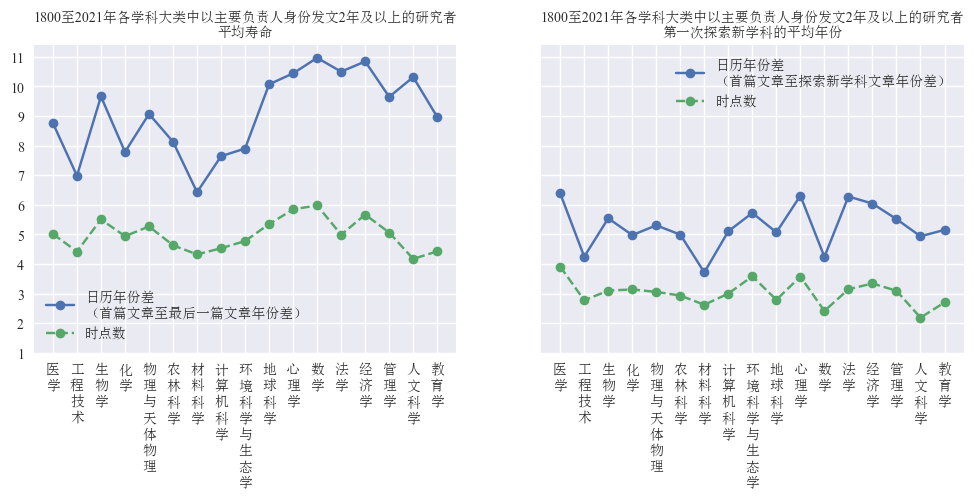

In [55]:
ept_list = []
for i in Fields:
    ept_list.append('\n'.join(list(i)))
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True,
                                    figsize=(12, 4)
                                    )
ax0.plot(Fields, avgDateSpan, 'o-',label='日历年份差\n（首篇文章至最后一篇文章年份差）')
ax1.plot(Fields, avgBreakthroughDateYear,'o-',label='日历年份差\n（首篇文章至探索新学科文章年份差）')
ax0.plot(Fields, avgTrueSpan, 'o--',label='时点数')
ax1.plot(Fields, avgBreakthroughPointYear, 'o--',label='时点数')
ax0.set_title('1800至2021年各学科大类中以主要负责人身份发文2年及以上的研究者\n平均寿命', fontsize='10')
ax0.set_xticks(Fields,ept_list)
ax1.set_title('1800至2021年各学科大类中以主要负责人身份发文2年及以上的研究者\n第一次探索新学科的平均年份', fontsize='10')
# ax.set_ylim(1,18)
ax0.legend()
ax1.legend()
ax0.set_yticks(np.array(range(1,12)))
fig.savefig("1800至2021年各学科大类中以主要负责人身份发文2年及以上的研究者平均寿命和第一次探索新学科的平均年份.png",dpi=300,bbox_inches='tight')

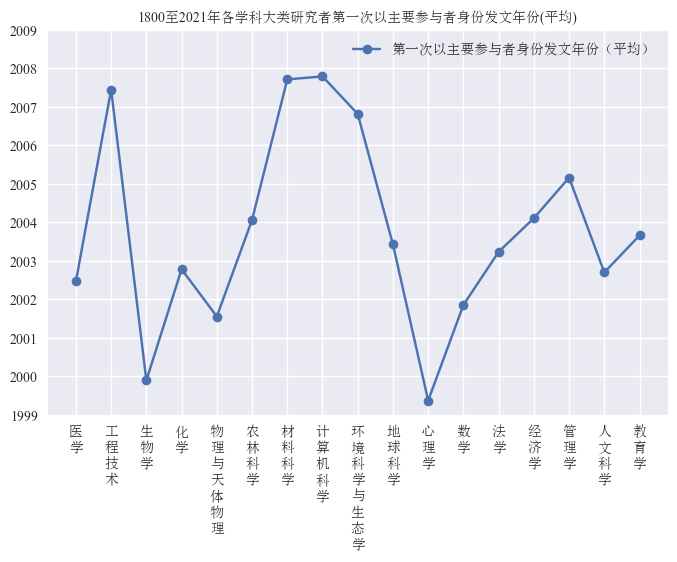

In [42]:
ept_list = []
for i in Fields:
    ept_list.append('\n'.join(list(i)))
fig, ax = plt.subplots( figsize=(8, 5)
                                    )
ax.plot(Fields, avgStartYear, 'o-',label='第一次以主要参与者身份发文年份（平均）')
ax.set_title('1800至2021年各学科大类研究者第一次以主要参与者身份发文年份(平均)', fontsize='10')
ax.set_xticks(Fields,ept_list)
ax.set_ylim(1999,2009)
ax.legend()
ax.set_yticks(np.array(range(1999,2010)))
fig.savefig("1800至2021年各学科大类平均研究者第一次以主要参与者身份发文年份(平均).png",dpi=300,bbox_inches='tight')

In [43]:
KeyBreakthroughCombineCounter

Counter({'化学-->>>>--工程技术': 62108,
         '化学-->>>>--材料科学': 73696,
         '医学-->>>>--化学': 33029,
         '医学-->>>>--生物学': 238620,
         '环境科学与生态学-->>>>--化学': 7901,
         '材料科学-->>>>--工程技术': 64880,
         '工程技术-->>>>--材料科学': 66530,
         '材料科学-->>>>--化学': 51317,
         '材料科学-->>>>--环境科学与生态学': 3292,
         '医学-->>>>--工程技术': 64753,
         '医学-->>>>--管理学': 5600,
         '化学-->>>>--物理与天体物理': 27293,
         '农林科学-->>>>--生物学': 50067,
         '生物学-->>>>--化学': 30287,
         '工程技术-->>>>--生物学': 20674,
         '材料科学-->>>>--物理与天体物理': 35126,
         '农林科学-->>>>--医学': 30191,
         '工程技术-->>>>--物理与天体物理': 48750,
         '化学-->>>>--农林科学': 11253,
         '计算机科学-->>>>--工程技术': 44949,
         '地球科学-->>>>--化学': 3989,
         '化学-->>>>--环境科学与生态学': 11872,
         '生物学-->>>>--医学': 187525,
         '生物学-->>>>--计算机科学': 2645,
         '地球科学-->>>>--工程技术': 19911,
         '环境科学与生态学-->>>>--地球科学': 17399,
         '工程技术-->>>>--地球科学': 19224,
         '医学-->>>>--心理学': 64599,
         '

In [44]:
index_map

{'医学': 0,
 '工程技术': 1,
 '生物学': 2,
 '化学': 3,
 '物理与天体物理': 4,
 '农林科学': 5,
 '材料科学': 6,
 '计算机科学': 7,
 '环境科学与生态学': 8,
 '地球科学': 9,
 '心理学': 10,
 '数学': 11,
 '法学': 12,
 '经济学': 13,
 '管理学': 14,
 '人文科学': 15,
 '教育学': 16}

In [45]:
import string
letter_map = {word:i for i, word in zip(string.ascii_uppercase, Fields)}
letter_map

{'医学': 'A',
 '工程技术': 'B',
 '生物学': 'C',
 '化学': 'D',
 '物理与天体物理': 'E',
 '农林科学': 'F',
 '材料科学': 'G',
 '计算机科学': 'H',
 '环境科学与生态学': 'I',
 '地球科学': 'J',
 '心理学': 'K',
 '数学': 'L',
 '法学': 'M',
 '经济学': 'N',
 '管理学': 'O',
 '人文科学': 'P',
 '教育学': 'Q'}

In [46]:
# 从大学科到小学科的转换
print('source,target,relativeWeight')
#relativeWeight: 转向XXX的占source所有作者的比例
for k,v in KeyBreakthroughCombineCounter.items():
    source2target = k.split('-->>>>--')
    # 保证是从大学科转向小学科， lettermap保证rawgraph里按照名字排序是合适的
    if index_map[source2target[0]]<index_map[source2target[1]]:
        print(str(letter_map[source2target[0]])+source2target[0]+','+str(letter_map[source2target[1]])+source2target[1]+','+str(v/KeyInitialSetCounter[source2target[0]]))

source,target,relativeWeight
D化学,G材料科学,0.12919557801066578
A医学,D化学,0.016982826926745395
A医学,C生物学,0.1226934560919188
B工程技术,G材料科学,0.0955384286204584
G材料科学,I环境科学与生态学,0.011005690062115955
A医学,B工程技术,0.033294649913335084
A医学,O管理学,0.002879403881127924
D化学,E物理与天体物理,0.047847032547833006
C生物学,D化学,0.045363452816736864
B工程技术,C生物学,0.029688283079803954
B工程技术,E物理与天体物理,0.0700059882045295
D化学,F农林科学,0.01972749999123456
D化学,I环境科学与生态学,0.020812661503237954
C生物学,H计算机科学,0.0039616446891494374
I环境科学与生态学,J地球科学,0.09188270023922561
B工程技术,J地球科学,0.027606053687053846
A医学,K心理学,0.03321546630660407
B工程技术,P人文科学,0.0014661766965502485
A医学,M法学,0.008388320520843028
C生物学,F农林科学,0.0759108038319364
C生物学,J地球科学,0.01106264940418062
E物理与天体物理,L数学,0.02534574328232634
E物理与天体物理,G材料科学,0.1292317400220855
B工程技术,D化学,0.06905534278521876
B工程技术,Q教育学,0.0009994701085200518
A医学,Q教育学,0.00625293403542798
A医学,P人文科学,0.003104614398973287
B工程技术,L数学,0.015490350661789942
F农林科学,M法学,0.0045921195888132624
A医学,I环境科学与生态学,0.009426962635107028
F农林科学,I环境科学与生态学,

In [47]:
# 小学科流向大学科
print('source,target,relativeWeight')
#relativeWeight: 转向XXX的占source所有作者的比例
for k,v in KeyBreakthroughCombineCounter.items():
    source2target = k.split('-->>>>--')
    # 保证是从小学科转向大学科
    if index_map[source2target[0]]>index_map[source2target[1]]:
        print(str(letter_map[source2target[0]])+source2target[0]+','+str(letter_map[source2target[1]])+source2target[1]+','+str(v/KeyInitialSetCounter[source2target[0]]))

source,target,relativeWeight
D化学,B工程技术,0.10888079351778157
I环境科学与生态学,D化学,0.04172453673142833
G材料科学,B工程技术,0.21690436550124031
G材料科学,D化学,0.1715610561718118
F农林科学,C生物学,0.16720992832953718
G材料科学,E物理与天体物理,0.11743191650118014
F农林科学,A医学,0.10082958727698997
H计算机科学,B工程技术,0.22235138731554813
J地球科学,D化学,0.021640888204115513
C生物学,A医学,0.2808723706361997
J地球科学,B工程技术,0.10801998622014138
L数学,H计算机科学,0.09241130863810791
J地球科学,C生物学,0.04074281033163888
B工程技术,A医学,0.054479737035968
N经济学,M法学,0.10921315646011266
D化学,A医学,0.07028480668697912
I环境科学与生态学,F农林科学,0.10851759337984063
I环境科学与生态学,C生物学,0.15038471490961708
I环境科学与生态学,B工程技术,0.09993610088666621
E物理与天体物理,B工程技术,0.14622180154598516
M法学,K心理学,0.08131728942368588
D化学,C生物学,0.06235383628261182
Q教育学,O管理学,0.033542976939203356
G材料科学,F农林科学,0.005435981786452169
F农林科学,B工程技术,0.04075130416196322
E物理与天体物理,A医学,0.015472997844034286
E物理与天体物理,D化学,0.0704106851764211
J地球科学,E物理与天体物理,0.037851210077742274
F农林科学,D化学,0.03375124404694315
K心理学,C生物学,0.025661720576974814
K心理学,A医学,0.316915350

In [48]:
# # 不限制
# print('source,target,weight,sourceweight')
# for k,v in KeyBreakthroughCombineCounter.items():
#     source2target = k.split('-->>>>--')
#     print(str(letter_map[source2target[0]])+source2target[0]+','+str(letter_map[source2target[1]])+source2target[1]+','+str(v)+','+str(KeyInitialSetCounter[source2target[0]]))

转换率随时间变动：每年的总人数、每年跨过的人数。【做一个全领域的，做一个管理学的】

全领域： x：年份；y:（转移过学科的人/总人数），注意这里总人数已经是参与比较多的人了。
管理学，与上边基本一致，不同在于总人数、转移过学科的人的初始学科中应该包含管理学。

In [49]:
keyYearlyStartCounter=pk.load( open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/keyYearlyStartCounter%d_%d_True%dCut全生涯Span%d.pk'%(START_YAER,END_YAER,cutyearCount,InitialSpan), 'rb'))
keyYearlyCrossCounter=pk.load( open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/keyYearlyCrossCounter%d_%d_True%dCut全生涯Span%d.pk'%(START_YAER,END_YAER,cutyearCount,InitialSpan), 'rb'))
keyYearlyStartCounterManagement=pk.load( open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/keyYearlyStartCounterManagement%d_%d_True%dCut全生涯Span%d.pk'%(START_YAER,END_YAER,cutyearCount,InitialSpan), 'rb'))
keyYearlyCrossCounterManagement=pk.load( open('../../DataCrossBoundaryPerspective_InterdisciplinaryResearch/keyYearlyCrossCounterManagement%d_%d_True%dCut全生涯Span%d.pk'%(START_YAER,END_YAER,cutyearCount,InitialSpan), 'rb'))

In [50]:
year, startCounter = zip(*sorted(keyYearlyStartCounter.items()))
startCounter = np.array(startCounter)

for k, v in keyYearlyStartCounter.items():
    if k not in keyYearlyCrossCounter:
        keyYearlyCrossCounter[k] = 0

year, crossCounter = zip(*sorted(keyYearlyCrossCounter.items()))
crossCounter = np.array(crossCounter)

mngyear, mngstartCounter = zip(*sorted(keyYearlyStartCounterManagement.items()))
mngstartCounter = np.array(mngstartCounter)
for k, v in keyYearlyStartCounterManagement.items():
    if k not in keyYearlyCrossCounterManagement:
        keyYearlyCrossCounterManagement[k] = 0
mngyear, mngcrossCounter = zip(*sorted(keyYearlyCrossCounterManagement.items()))
mngcrossCounter = np.array(mngcrossCounter)

In [51]:
sorted(keyYearlyCrossCounterManagement.items())

[(1947, 2),
 (1949, 2),
 (1950, 0),
 (1951, 2),
 (1952, 4),
 (1953, 1),
 (1954, 2),
 (1955, 5),
 (1956, 3),
 (1957, 7),
 (1958, 7),
 (1959, 9),
 (1960, 7),
 (1961, 11),
 (1962, 13),
 (1963, 21),
 (1964, 21),
 (1965, 24),
 (1966, 23),
 (1967, 41),
 (1968, 36),
 (1969, 40),
 (1970, 51),
 (1971, 86),
 (1972, 106),
 (1973, 103),
 (1974, 120),
 (1975, 138),
 (1976, 172),
 (1977, 184),
 (1978, 246),
 (1979, 200),
 (1980, 216),
 (1981, 268),
 (1982, 273),
 (1983, 295),
 (1984, 362),
 (1985, 394),
 (1986, 390),
 (1987, 409),
 (1988, 496),
 (1989, 476),
 (1990, 526),
 (1991, 662),
 (1992, 667),
 (1993, 725),
 (1994, 788),
 (1995, 835),
 (1996, 888),
 (1997, 799),
 (1998, 913),
 (1999, 886),
 (2000, 1029),
 (2001, 1109),
 (2002, 1151),
 (2003, 1264),
 (2004, 1351),
 (2005, 1480),
 (2006, 1701),
 (2007, 1753),
 (2008, 1696),
 (2009, 1910),
 (2010, 1743),
 (2011, 1675),
 (2012, 1789),
 (2013, 1725),
 (2014, 1708),
 (2015, 1653),
 (2016, 1634),
 (2017, 1548),
 (2018, 1287),
 (2019, 1162),
 (2020, 7

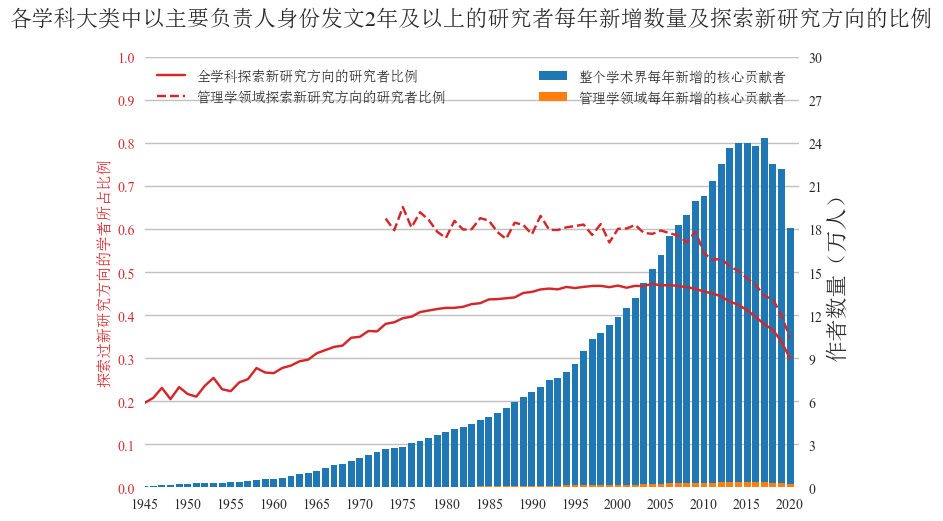

In [52]:
# 迁移率随时间变化（至少2年主要负责人经历）
fig, ax2 = plt.subplots()
# 双轴
ax = ax2.twinx()
ax2.set_zorder(ax.get_zorder()+1)
ax2.patch.set_visible(False)
# plt.text(-0.03,1.07,'单位：(万人)',
# horizontalalignment='center',verticalalignment='center',
# transform=ax.transAxes)
bars = ax.bar(year, startCounter/10000.0, label='整个学术界每年新增的核心贡献者',color='tab:blue')
# ax.bar_label(bars,fmt = '%.2f万',font=prop.get_name(),fontsize=9, padding=1,rotation=20)
subbars = ax.bar(mngyear, mngstartCounter/10000.0,color='tab:orange',label='管理学领域每年新增的核心贡献者')
# ax.bar_label(subbars,fmt = '%.4f万',font=prop.get_name(),fontsize=9, padding=1,rotation=20)
ax.set_xlim(1946,2021)
ax.set_ylim(0,30)
ax.set_ylabel('作者数量（万人）', font=prop.get_name())
ax.set_xlabel('年份', font=prop.get_name())
ax.set_title('各学科大类中以主要负责人身份发文2年及以上的研究者每年新增数量及探索新研究方向的比例\n', font=prop.get_name())
ax.set_xticks(range(1945,2021,5))
ax.set_yticks(np.array(range(0,31,3)))
# ax.xaxis.set_tick_params(labelsize=12)
# ax.yaxis.set_tick_params(labelsize=12)
ax.grid(True,color = 'silver')

ax2.plot(year, crossCounter/startCounter,color='tab:red',label = '全学科探索新研究方向的研究者比例',zorder=-1)
ax2.plot(mngyear[25:], mngcrossCounter[25:]/mngstartCounter[25:],'x--', color='tab:red',label = '管理学领域探索新研究方向的研究者比例')
ax2.grid(False)
ax2.set_ylim(0,1)
ax2.set_yticks(np.array(range(0,11))/10)
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.set_ylabel('探索过新研究方向的学者所占比例', color='tab:red')
ax.legend()
ax2.legend(loc='upper left')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
fig.savefig("各学科大类中以主要负责人身份发文2年及以上的研究者每年新增数量及探索新研究方向的比例.png",dpi=300,bbox_inches='tight')